# Final Project - Word Cloud

In [1]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing C:\Users\leste\Anaconda3\lib\site-packages\fileupload\static -> fileupload
Up to date: C:\Users\leste\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Up to date: C:\Users\leste\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Up to date: C:\Users\leste\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: ok


IMPORTANT! If this was your first time running the above cell containing the installs and imports, you will need save this notebook now. Then under the File menu above, select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take affect.

In [2]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `Spurs.txt` (19.16 kB)


In [3]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just", "in", "on"]
    
    # LEARNER CODE START HERE
    file_contents = file_contents.lower()
    new_file_contents=""
    for letter in file_contents:
        if letter not in punctuations:
            new_file_contents=new_file_contents+letter
    words=new_file_contents.split()
    full_words=[]
    words_frequency={}
    for word in words:
        if word.isalpha():
            if word not in uninteresting_words:
                full_words.append(word)
    for wordx in full_words:
        if wordx not in words_frequency:
            words_frequency[wordx]=1
        else:
            words_frequency[wordx]+=1

#wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(words_frequency)
    return cloud.to_array()

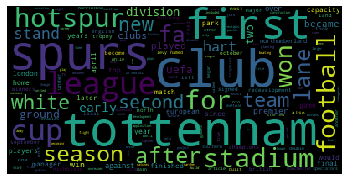

In [4]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()